# Assignment - 4 : Haberman Survival Data

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer. There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

1.Number of Axillary nodes(Lymph Nodes): Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

2.Age: It represent the age of patient at which they undergone surgery (age from 30 to 83)

3.Operation Year: Year in which patient was undergone surgery(1958–1969)

4.Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.
##### objectives: Where the patient is survived or not.

In [31]:
# importing packages and haberman Dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import warnings 
warnings.filterwarnings("ignore") 

haberman = pd.read_csv("haberman.csv")
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [32]:
# We have 306 records and 4 columns

print(haberman.shape)

(306, 4)


In [33]:
# In our dataset we have 4 columns - age(Numerical), year(Numerical), nodes(Numerical), status(Class lable)

print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [34]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

##### Obeservation : 
In Our Data set We have two class 1= Survived and 2= Not Servived, 225 pateint out of 306 are servived and 81 out of 306 are not servived.and our data is not a Balance data.

## 2D Scatter plot

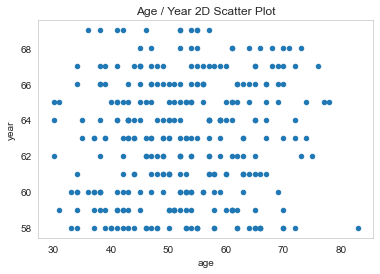

In [35]:
# from this scatter plot of Age and Year we're not getting any meaning full infomation so we'll try all combination.

haberman.plot(kind = 'scatter', x = 'age', y = 'year')
plt.title('Age / Year 2D Scatter Plot')
plt.grid()
plt.show()

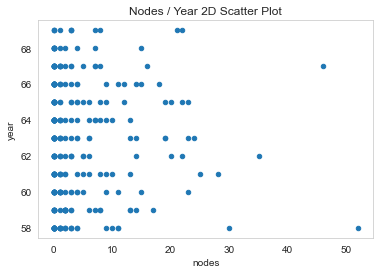

In [36]:
# Nodes and Year also not gives us meaning full information, so go for next combination.

haberman.plot(kind = 'scatter', x = 'nodes', y = 'year')
plt.title('Nodes / Year 2D Scatter Plot')
plt.grid()
plt.show()

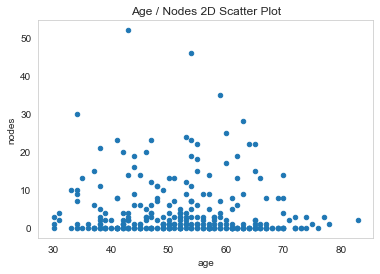

In [37]:
# from this two labels Age and Nodes we get much more meaning full information so we go with this combination.

haberman.plot(kind = 'scatter', x = 'age', y = 'nodes')
plt.title('Age / Nodes 2D Scatter Plot')
plt.grid()
plt.show()

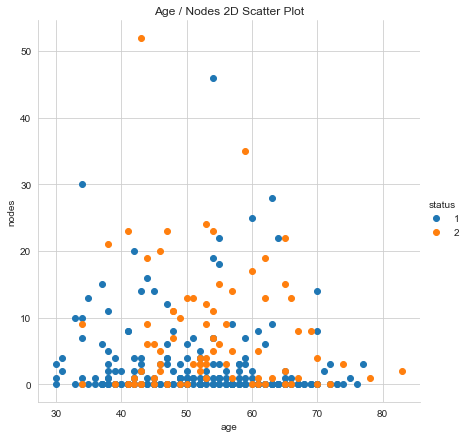

In [38]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status', size = 6)\
    .map(plt.scatter, "age", "nodes")\
    .add_legend()
plt.title('Age / Nodes 2D Scatter Plot')
plt.show()

##### Observation:
1. Patient with 0 Nodes of all ages are more survived.
2. There are less number of peoples with moore than 25 Nodes
3. Pateint with greater than age 50 and nodes greaterthan 10 are less survived 

## Pair-Plot

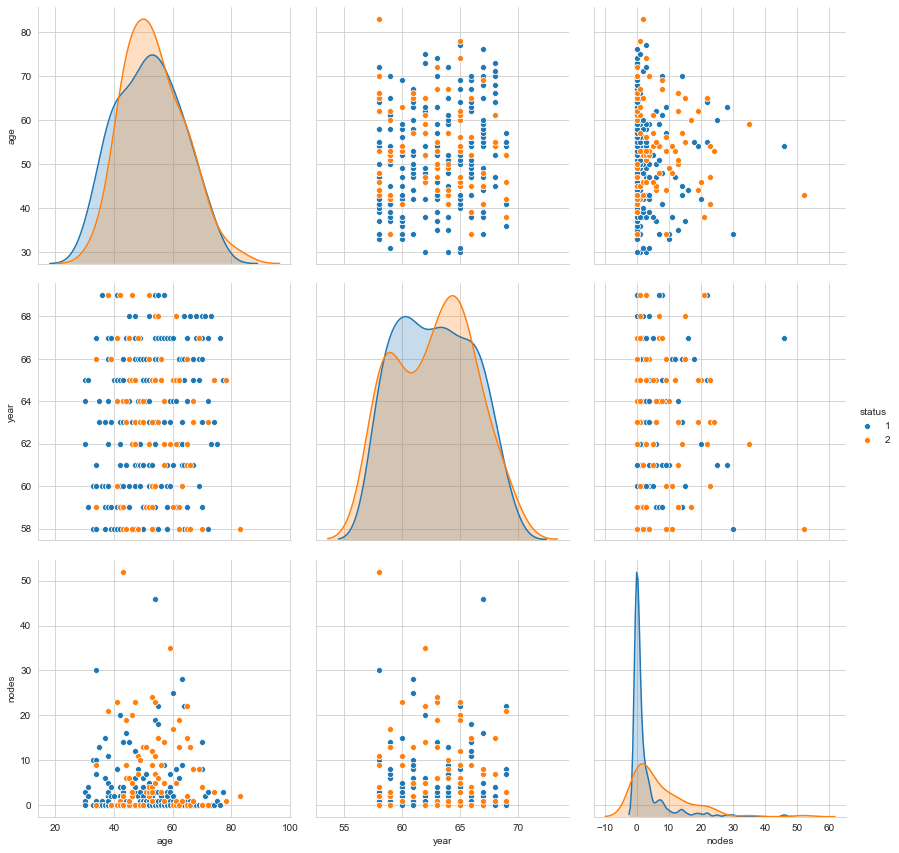

In [39]:
plt.close()
x = y = ['age', 'year', 'nodes']
sns.set_style('whitegrid')
sns.pairplot(haberman, hue = 'status', x_vars=x, y_vars=y, size = 4)

##### Obersvation :
As per our observation on pair plot, the plot of age and nodes are looks good and data points are very well seprated, so this combination is better.

# Histogram, PDF, CDF

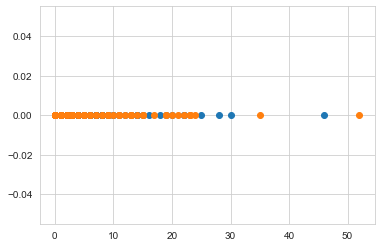

In [40]:
# Opps here is extremely hard like imposible to make any sense from it or try understand. 

haberman_Long_Servive = haberman.loc[haberman['status'] == 1]
haberman_Short_Servive = haberman.loc[haberman['status'] ==2]
plt.plot(haberman_Long_Servive['nodes'], np.zeros_like(haberman_Long_Servive['nodes']), 'o')
plt.plot(haberman_Short_Servive['nodes'], np.zeros_like(haberman_Short_Servive['nodes']), 'o')

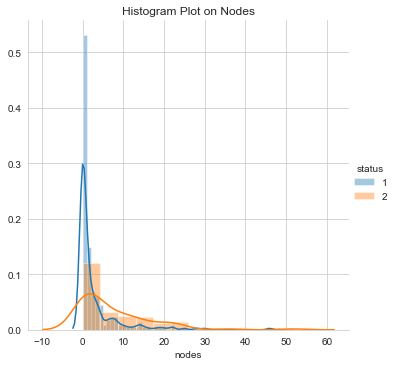

In [41]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status', size = 5)\
    .map(sns.distplot, 'nodes')\
    .add_legend()
plt.title('Histogram Plot on Nodes')
plt.show()

##### Observation :
1. Pateint with 0 to 2 Nodes have more chance to survived.
2. Pateint with 25 and more than 25 nodes has less likely or no chance to servived.

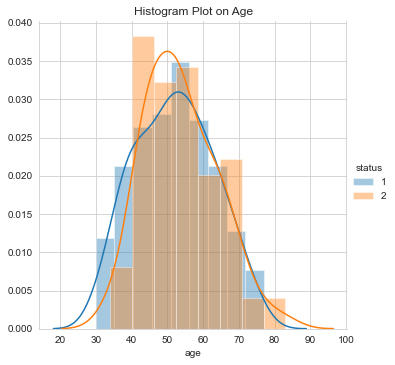

In [42]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue = 'status', size = 5)\
    .map(sns.distplot, 'age')\
    .add_legend()
plt.title('Histogram Plot on Age')
plt.show()

##### Observation :
1. Above PDF of age is try to shows that there is survival chances is not depend on patients age
2. Pateint with age 30 to 40 is more likely survived chances, patient who has age between 40 to 60 has less likely survived chances and pateint between age group 60 to aprox. 77 has same chances.

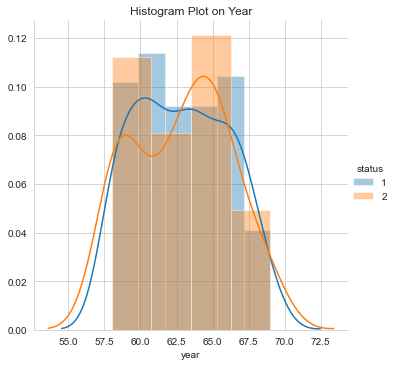

In [43]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue ='status', size = 5)\
    .map(sns.distplot, 'year')\
    .add_legend()
plt.title('Histogram Plot on Year')
plt.show()

##### Observation :
As per above PDF We can say there were in 1958 to 1962 more successfull operation has done.

--- PDF ---

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

--- Bin Edges ---

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

--- CDF ---

[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
--- PDf ---

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]

--- Bin Edges ---

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

--- CDF ---

[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


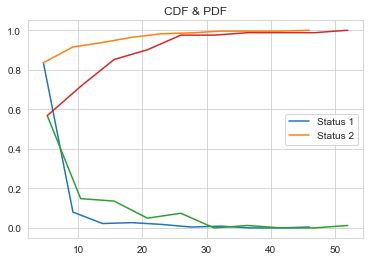

In [44]:
counts, bin_edges = np.histogram(haberman_Long_Servive['nodes'], bins = 10, density = True)
pdf = counts/(sum(counts))
print("--- PDF ---\n")
print(pdf)
print("\n--- Bin Edges ---\n")
print(bin_edges)
print("\n--- CDF ---\n")
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf) 


counts, bin_edges = np.histogram(haberman_Short_Servive['nodes'], bins = 10, density = True)
pdf = counts / (sum(counts))
print("--- PDf ---\n")
print(pdf)
print("\n--- Bin Edges ---\n")
print(bin_edges)
cdf = np.cumsum(pdf)
print("\n--- CDF ---\n")
print(cdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('CDF & PDF')
plt.legend(["Status 1", "Status 2"]) 

##### Observation : 
From the above CDF we caan say that there is approx. 84% patient who have servived has nodes between 0 to 4.

# Mean, Median, Sandard Deviation, Quantile, 90th Percentile

In [45]:

print("--- Means ---\n")                                         # Mean is nothing but avarage
print(np.mean(haberman_Long_Servive["nodes"]))                   # Here We Calculate normal mean
print(np.mean(np.append(haberman_Long_Servive["nodes"], 50 )))   # Here we add on outlier and see our mean get impacted by outlier
print(np.mean(haberman_Short_Servive["nodes"]))


print("\n--- Standard Deviation ---\n")                          # Standard Deviation is shows us how data is varied(Varience of datapoints)
print(np.std(haberman_Long_Servive["nodes"]))
print(np.std(haberman_Short_Servive["nodes"]))


print("\n--- Median ---\n")                                      # We can call median as a center value of our dataset
print(np.median(haberman_Long_Servive["nodes"]))
print(np.median(np.append(haberman_Long_Servive["nodes"], 50 ))) # Here we add outlier in our dataset but here is no effect on median
print(np.median(haberman_Short_Servive["nodes"]))


print("\n--- Quantile ---\n")                                    # Quantile is 1/4th part of total dataset
print(np.percentile(haberman_Long_Servive["nodes"], np.arange(0, 100, 25)))
print(np.percentile(haberman_Short_Servive["nodes"], np.arange(0, 100, 25)))


print("\n--- 90th percentile ---\n")                            # 90th Percentile means value at 90th percent in dataset not a 90% data
print(np.percentile(haberman_Long_Servive["nodes"], 90))
print(np.percentile(haberman_Short_Servive["nodes"], 90))


--- Means ---

2.7911111111111113
3.0
7.45679012345679

--- Standard Deviation ---

5.857258449412131
9.128776076761632

--- Median ---

0.0
0.0
4.0

--- Quantile ---

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

--- 90th percentile ---

8.0
20.0


# Box Plot

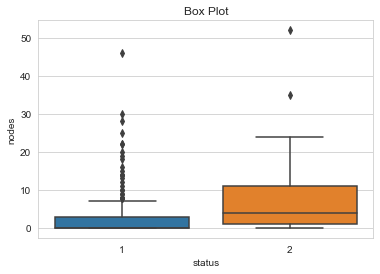

In [46]:
sns.boxplot(x = 'status', y = 'nodes', data = haberman)
plt.title('Box Plot')
plt.show()

# Violine Plot

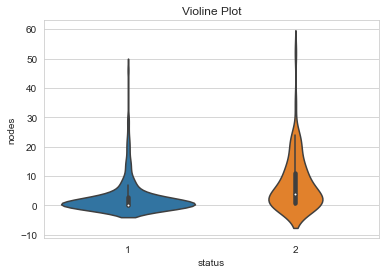

In [47]:
sns.violinplot(x = 'status', y = 'nodes', data = haberman)
plt.title('Violine Plot')
plt.show()

##### Observation : From above Box plot and above Violine plot
1. Patient who have more than 1 nodes not likely survived.
2. Patient with 0 nodes have more chance to survive but there is in some cases patient not serviveved within 5 years of operation with less number of positive axillury nodes, so positive axillury node does not decide a
were patient is survived or not.
3. Patient operate in between 1958 to 1963 are more likely survived
4. Pateint with age group of 42 to 60 less likely survived so age factor not decide survival of patient.

# Contour Plot

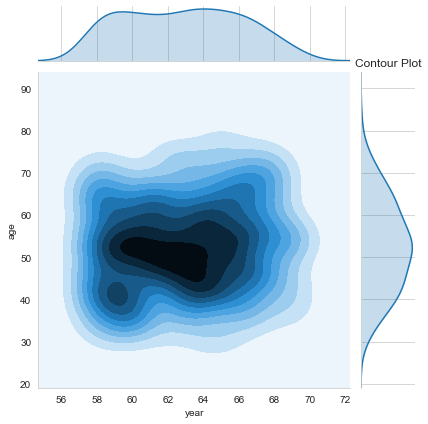

In [49]:
sns.jointplot(x = 'year', y = 'age', data = haberman, kind = 'kde')
plt.title('Contour Plot')
plt.show()

##### Observation : 
from bellow contour plot we can say that the patient with age group 45 to 55 and year of 1959 to 1946 are done more operation.and patient more likely survived

## Final Obeservation  :
                     
1. Age is Different Factor which not decide pateint is survived or not, but as per our observation we can say patient with age group 30 to 40 more likely survived.
2. Pateient with 0 nodes more likely survived, patient with more than 1 nodes less likely survived and patient with more than 25 nodes are same chances of survived and not survived.
3. we not say fix that if patient who don't have positive axillury node have more survived chances.